In [123]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import urllib.request
import time
from bs4 import BeautifulSoup
from geopy.geocoders import Nominatim
import geopandas as gpd
import seaborn as sns
from scipy import stats
import requests
import json

In [137]:
url = 'https://www.zoocasa.com/services/api/v3/listings?sort=-date&filter%5Brental%5D=false&filter%5Bstatus%5D=not-available-sold&filter%5Bslug%5D=hamilton-on&filter%5Blatitude%5D=43.6532260097615&filter%5Blongitude%5D=-79.3831843&filter%5Bzoom%5D=14&filter%5Bhome-type%5D%5Bhouse-detached%5D=true&filter%5Bhome-type%5D%5Bhouse-semidetached%5D=true&filter%5Bhome-type%5D%5Bhouse-attached%5D=true&filter%5Bhome-type%5D%5Btownhouse%5D=true&filter%5Bhome-type%5D%5Bcondo%5D=true&filter%5Bprice-min%5D=&filter%5Bprice-max%5D=&filter%5Blisted-since%5D=&filter%5Bbedrooms%5D=0%2B&filter%5Bsqft-min%5D=&filter%5Bsqft-max%5D=&filter%5Bbathrooms%5D=1%2B&filter%5Bparking-spaces%5D=0%2B&filter%5Bopen-house%5D=false&filter%5Bgarage%5D=false&filter%5Bpool%5D=false&filter%5Bfireplace%5D=false&filter%5Bwaterfront%5D=false&filter%5Badditional%5D%5Bhouse%5D%5Bsingle-family%5D=false&filter%5Badditional%5D%5Bhouse%5D%5Bbasement-apartment%5D=false&filter%5Badditional%5D%5Bhouse%5D%5Bduplex%5D=false&filter%5Badditional%5D%5Bhouse%5D%5Btriplex%5D=false&filter%5Badditional%5D%5Bhouse%5D%5Bfourplex%2B%5D=false&filter%5Badditional%5D%5Bcondo-or-townhouse%5D%5Blocker%5D=any&filter%5Badditional%5D%5Bcondo-or-townhouse%5D%5Bmaintenance-fee%5D=&filter%5Barea-name%5D=&page%5Bnumber%5D=35&page%5Bsize%5D=24'

In [138]:


raw = requests.get(url).json()

In [143]:
raw['data'][8]['attributes']

{'is-rental': False,
 'status': 'not_available_sold',
 'price': '599900.0',
 'square-footage': {'max': 1500, 'min': 1100},
 'address-path': '/hamilton-on-real-estate/319-macintosh-dr',
 'bedrooms': 3,
 'bathrooms': 3,
 'bedrooms-partial': None,
 'bathrooms-partial': None,
 'is-vow': False,
 'is-crea': False,
 'is-image-ready': True,
 'position': None,
 'unit-number': None,
 'street-number': '319',
 'street-name': 'Macintosh Dr',
 'city': 'Hamilton',
 'province': 'ON',
 'postal-code': 'L8E4E1',
 'open-houses': None,
 'style-name': 'house-detached',
 'image-url': 'https://cdn2.zoocasa.com/images/listings/a9aa2573-10c9-4010-b5c5-e5785b582ca7.jpg',
 'thumbnail-url': 'https://thumbnails.zoocasa.com/10248627-319-macintosh-dr-hamilton-on-X5002266/photo-1.jpg',
 'path': '/hamilton-on-real-estate/10248627-319-macintosh-dr-hamilton-on-l8e4e1',
 'added-at': '2020-11-28T12:35:11.624Z',
 'expired-at': None,
 'sold-price': '626000.0',
 'sold-at': '2020-12-02T04:00:00.000Z',
 'last-status': 'Sld'}

In [132]:
raw['data'][6]['attributes']['path']

'/hamilton-on-real-estate/10282581-195-cannon-st-e-hamilton-on-l8l2a7'

In [95]:
raw['data'][0]['attributes']['address-path']

'/hamilton-on-real-estate/88-hillview-st'

In [395]:
data = pd.DataFrame(columns=['Page_no','Link_no','Address','Sold_price','List_price','Style',
                                'Bedrooms','Bathrooms','Sqft_min','Sqft_max','Latitude',
                                'Longitude','Postal_code','Added_at','Sold_at','Last_status',
                                'Link_path','Address_path'])


total_pages = 50
i = 0
skipped = []

for num in range(1, total_pages+1):
    try:
        url = 'https://www.zoocasa.com/services/api/v3/listings?sort=-date&filter%5Brental%5D=false&filter%5Bstatus%5D=not-available-sold&filter%5Bslug%5D=hamilton-on&filter%5Blatitude%5D=43.6532260097615&filter%5Blongitude%5D=-79.3831843&filter%5Bzoom%5D=14&filter%5Bhome-type%5D%5Bhouse-detached%5D=true&filter%5Bhome-type%5D%5Bhouse-semidetached%5D=true&filter%5Bhome-type%5D%5Bhouse-attached%5D=true&filter%5Bhome-type%5D%5Btownhouse%5D=true&filter%5Bhome-type%5D%5Bcondo%5D=true&filter%5Bprice-min%5D=&filter%5Bprice-max%5D=&filter%5Blisted-since%5D=&filter%5Bbedrooms%5D=0%2B&filter%5Bsqft-min%5D=&filter%5Bsqft-max%5D=&filter%5Bbathrooms%5D=1%2B&filter%5Bparking-spaces%5D=0%2B&filter%5Bopen-house%5D=false&filter%5Bgarage%5D=false&filter%5Bpool%5D=false&filter%5Bfireplace%5D=false&filter%5Bwaterfront%5D=false&filter%5Badditional%5D%5Bhouse%5D%5Bsingle-family%5D=false&filter%5Badditional%5D%5Bhouse%5D%5Bbasement-apartment%5D=false&filter%5Badditional%5D%5Bhouse%5D%5Bduplex%5D=false&filter%5Badditional%5D%5Bhouse%5D%5Btriplex%5D=false&filter%5Badditional%5D%5Bhouse%5D%5Bfourplex%2B%5D=false&filter%5Badditional%5D%5Bcondo-or-townhouse%5D%5Blocker%5D=any&filter%5Badditional%5D%5Bcondo-or-townhouse%5D%5Bmaintenance-fee%5D=&filter%5Barea-name%5D=&page%5Bnumber%5D='+str(num)+'&page%5Bsize%5D=24'
        raw = requests.get(url).json()
        
        for listing in raw['data']:
            
            try:
            
                data.loc[i,'Page_no'] = num
                data.loc[i,'Link_no'] = i+1
                att = listing['attributes']
                data.loc[i,'Address'] = att['street-number']+" "+att['street-name']
                data.loc[i,'Sold_price'] = att['sold-price']
                data.loc[i,'List_price'] = att['price']
                data.loc[i,'Style'] = att['style-name']
                data.loc[i,'Bedrooms'] = att['bedrooms']
                data.loc[i,'Bathrooms'] = att['bathrooms']
                
                if not att['position'] == None:
                    data.loc[i,'Latitude'] = att['position']['coordinates'][0]
                    data.loc[i,'Longitude'] = att['position']['coordinates'][1]
                else:
                    data.loc[i,'Latitude'] = np.nan
                    data.loc[i,'Longitude'] = np.nan
                data.loc[i,'Postal_code'] = att['postal-code']
                data.loc[i,'Added_at'] = att['added-at']
                data.loc[i,'Sold_at'] = att['sold-at']
                data.loc[i,'Last_status'] = att['last-status']
                data.loc[i,'Link_path'] = att['path']
                data.loc[i,'Address_path'] = att['address-path']
                data.loc[i,'Sqft_max'] = att['square-footage']['max']
                data.loc[i,'Sqft_min'] = att['square-footage']['min']
                
            except:
                pass
                print('Problem with Page',num,'Address:', att['street-number']+" "+att['street-name'])
            
            i += 1
            
        time.sleep(1)
        
    except:
        print('Problem with page',num)
        skipped.append(i)
        continue

data.to_excel('data_HT.xlsx')
data.shape

Problem with Page 1 Address: 49 Dunkirk Dr
Problem with Page 1 Address: 3 Shippee Ave
Problem with Page 1 Address: 201 Jackson St E
Problem with Page 2 Address: 284 Paling Ave
Problem with Page 3 Address: 115 Welbourn Dr
Problem with Page 3 Address: 46 Southmeadow Cres
Problem with Page 3 Address: 90 East 24th St
Problem with Page 3 Address: 67 West 5th St
Problem with Page 4 Address: 52 Sherway St
Problem with Page 4 Address: 8 Crystal Crt
Problem with Page 5 Address: 105 Tuxedo Ave S
Problem with Page 5 Address: 40 East 16th St
Problem with Page 5 Address: 134 Robins Ave
Problem with Page 5 Address: 258 Sanatorium Rd
Problem with Page 5 Address: 131 Fielding Cres
Problem with Page 6 Address: 25 Ossington Dr
Problem with Page 7 Address: 27 Canoe Lane
Problem with Page 7 Address: 475 Ferguson Ave N
Problem with Page 7 Address: 9 Southview Pl
Problem with Page 8 Address: 13 Desjardins Ave
Problem with Page 8 Address: 227 Belmont Ave
Problem with Page 8 Address: 340 Jackson St W
Problem 

Problem with Page 43 Address: 28 Terrace Dr
Problem with Page 43 Address: 445 Upper Kenilworth Ave
Problem with Page 43 Address: 104 Spadina Ave
Problem with Page 43 Address: 80 Scarletwood St
Problem with Page 43 Address: 89 Seabreeze Cres
Problem with Page 44 Address: 867 Upper Sherman Ave
Problem with Page 44 Address: 19 Mahony Ave
Problem with Page 44 Address: 223 Gray Rd
Problem with Page 44 Address: 59 1/2 Wood St W
Problem with Page 44 Address: 2481 Barton St E
Problem with Page 44 Address: 115 Shaw St
Problem with Page 44 Address: 39 Pagebrook Cres
Problem with Page 45 Address: 1102 King St W
Problem with Page 45 Address: 5 Camelot Dr
Problem with Page 45 Address: 484 Cannon St E
Problem with Page 46 Address: 179 Mohawk Rd W
Problem with Page 46 Address: 54 Robins Ave
Problem with Page 46 Address: 51 Robroy Ave
Problem with Page 46 Address: 26 Balharbour Dr
Problem with Page 46 Address: 4 Blair Ave
Problem with Page 47 Address: 12 William St
Problem with Page 47 Address: 91 Oxf

(1200, 18)

In [149]:
len(data_HT.Address.unique())

1117

In [150]:
len(data_HT.Link_path.unique())

1200

In [151]:
data_HT.isnull().sum()

Page_no           0
Link_no           0
Address           0
Sold_price        0
List_price        0
Style             0
Bedrooms          0
Bathrooms         0
Sqft_min        220
Sqft_max        211
Latitude          3
Longitude         3
Postal_code       0
Added_at          0
Sold_at           0
Last_status       0
Link_path         0
Address_path      0
dtype: int64

In [153]:
data_HT.head()

,Page_no,Link_no,Address,Sold_price,List_price,Style,Bedrooms,Bathrooms,Sqft_min,Sqft_max,Latitude,Longitude,Postal_code,Added_at,Sold_at,Last_status,Link_path,Address_path
0,1,1,314 Darlington Crt,905000.0,699000.0,house-detached,3,2,2000,2500,-79.913,43.2283,L9C6Z2,2021-02-11T16:36:50.488Z,2021-02-18T04:00:00.000Z,Sld,/hamilton-on-real-estate/10508863-314-darlingt...,/hamilton-on-real-estate/314-darlington-ct
1,1,2,69 Richmond Cres,1456000.0,1299900.0,house-detached,4,4,3000,3500,-79.6408,43.2237,L8E5T9,2021-02-16T18:35:27.376Z,2021-02-17T04:00:00.000Z,Sld,/hamilton-on-real-estate/10517907-69-richmond-...,/hamilton-on-real-estate/69-richmond-cres
2,1,3,120 Cole St,980000.0,889900.0,house-attached,4,4,2500,3000,-79.9093,43.3387,L8B0A1,2021-02-13T12:48:44.294Z,2021-02-17T04:00:00.000Z,Sld,/hamilton-on-real-estate/10514029-120-cole-st-...,/hamilton-on-real-estate/120-cole-st
3,1,4,11 Reynold St,1050000.0,849999.0,house-detached,3,2,1100,1500,-79.8897,43.3355,L0R2H0,2021-02-12T15:36:56.821Z,2021-02-17T04:00:00.000Z,Sld,/hamilton-on-real-estate/10511696-11-reynold-s...,/hamilton-on-real-estate/11-reynold-st
4,1,5,832 Concession St,406000.0,329900.0,condo-highrise,1,1,600,699,-79.8406,43.2379,L8V1E2,2021-02-12T12:38:06.075Z,2021-02-17T04:00:00.000Z,Sld,/hamilton-on-real-estate/10510778-14-832-conce...,/hamilton-on-real-estate/14-832-concession-st


In [178]:
'http://www.zoocasa.com' + data_HT.loc[0,'Link_path']

'http://www.zoocasa.com/hamilton-on-real-estate/10508863-314-darlington-crt-hamilton-on-l9c6z2'

In [248]:
url = 'http://www.zoocasa.com/' + data_HT.loc[929,'Link_path']

request=urllib.request.Request(url,None,headers)
data_raw = urllib.request.urlopen(request).read()
soup = BeautifulSoup(data_raw, 'lxml')

script = soup.find("script", id="__NEXT_DATA__")
raw = str(script).split(">")[1].replace('</script',"")
json_data = json.loads(raw)
json_data

{'props': {'pageProps': {'routeName': 'listing',
   'props': {'listingData': {'id': 10221686,
     'price': 415900,
     'soldPrice': 447700,
     'bedrooms': 3,
     'bedroomsPartial': None,
     'bathrooms': 2,
     'bathroomsPartial': None,
     'squareFootage': {'min': 1100, 'max': 1500},
     'isVow': False,
     'isCrea': False,
     'isRental': False,
     'unitNumber': None,
     'streetNumber': '95',
     'streetName': 'Belview Ave',
     'neighbourhoodName': 'Crown Point West',
     'city': 'Hamilton',
     'imageUrl': 'https://cdn3.zoocasa.com/images/listings/6473582a-9fd5-41a7-abc4-fa19098051be.jpg',
     'thumbnailUrl': 'https://thumbnails.zoocasa.com/10221686-95-belview-ave-hamilton-on-X4991971/photo-1.jpg',
     'addedAt': 1605634568407,
     'expiredAt': None,
     'soldAt': 1606276800000,
     'path': '/hamilton-on-real-estate/10221686-95-belview-ave-hamilton-on-l8l7k9',
     'province': 'ON',
     'addressPath': '/hamilton-on-real-estate/95-belview-ave',
     'status'

In [250]:
json_data['props']['pageProps']['props']['listingData']['parking']

3

In [252]:
Houses = pd.DataFrame(columns=['Link_num','Title','Type','Exterior','Basement','Pool',
                                'Sqft_max','Sqft_min','Parking','Balcony','Kitchens',
                                'Lot_frontage','Lot_depth','Parking_included','Parking_spaces',
                                'Heat_included','Hydro_included','Approx_age','Extras','Is_rental',
                               'Description','MLS','Neighbourhood','Latitude2','Longitude2','Link'])
skipped = []
i = 0

for no in range(0, data_HT.shape[0]):
    try:
        url = 'http://www.zoocasa.com/' + data_HT.loc[no,'Link_path']

        request=urllib.request.Request(url,None,headers)
        data_raw = urllib.request.urlopen(request).read()
        soup = BeautifulSoup(data_raw, 'lxml')

        script = soup.find("script", id="__NEXT_DATA__")
        raw = str(script).split(">")[1].replace('</script',"")
        json_data = json.loads(raw)

        listing = json_data['props']['pageProps']['props']['listingData']
            
        Houses.loc[no,'Link_num'] = no+1 
        Houses.loc[no,'Title'] = soup.title.contents[0]
        Houses.loc[no,'Is_rental'] = listing['isRental']
        if not listing['squareFootage'] == None:
            Houses.loc[no,'Sqft_max'] = listing['squareFootage']['max']
            Houses.loc[no,'Sqft_min'] = listing['squareFootage']['min']
        else:
            Houses.loc[no,'Sqft_max'] = np.nan
            Houses.loc[no,'Sqft_min'] = np.nan
        Houses.loc[no,'Parking'] = listing['parking']
        Houses.loc[no,'Exterior'] = listing['exterior']
        Houses.loc[no,'Basement'] = listing['basement']
        Houses.loc[no,'Pool'] = listing['pool']
        Houses.loc[no,'Extras'] = listing['extras']
        Houses.loc[no,'Description'] = listing['description']
        Houses.loc[no,'MLS'] = listing['mlsNum']
        Houses.loc[no,'Type'] = listing['type']
        Houses.loc[no,'Link'] = url
        Houses.loc[no,'Neighbourhood'] = listing['neighbourhoodName']
        Houses.loc[no,'Balcony'] = listing['misc']['balcony']
        Houses.loc[no,'Kitchens'] = listing['misc']['kitchens']
        Houses.loc[no,'Parking_included'] = listing['misc']['parkingIncluded']
        Houses.loc[no,'Parking_spaces'] = listing['misc']['parkingSpaces']
        Houses.loc[no,'Heat_included'] = listing['misc']['heatIncluded']
        Houses.loc[no,'Hydro_included'] = listing['misc']['hydroIncluded']
        Houses.loc[no,'Approx_age'] = listing['misc']['approxAge']
        if not listing['position'] == None:
            Houses.loc[no,'Latitude2'] = listing['position']['coordinates'][0]
            Houses.loc[no,'Longitude2'] = listing['position']['coordinates'][1]
        else:
            Houses.loc[no,'Latitude2'] = np.nan
            Houses.loc[no,'Longitude2'] = np.nan
        Houses.loc[no,'Garage'] = listing['garage']
        Houses.loc[no,'Heat'] = listing['heat']
        Houses.loc[no,'Heating_fuel'] = listing['heatingFuel']
        Houses.loc[no,'AC'] = listing['ac']
        Houses.loc[no,'Lot_frontage'] = listing['lotFrontage']
        Houses.loc[no,'Lot_depth'] = listing['lotDepth']

        no += 1
                           
        time.sleep(1)
    
    except:
        print('Problem with link:', no+1)
        skipped.append(no+1)
        continue   
        
Houses.to_excel('Houses.xlsx')
Houses.shape

(1200, 30)

In [253]:
Houses.isnull().sum()

Link_num               0
Title                  0
Type                   0
Exterior               0
Basement               0
Pool                1200
Sqft_max             211
Sqft_min             220
Parking                0
Balcony             1014
Kitchens               1
Lot_frontage         205
Lot_depth            205
Parking_included       0
Parking_spaces         0
Heat_included       1014
Hydro_included      1014
Approx_age           279
Extras               101
Is_rental              0
Description            5
MLS                    0
Neighbourhood          1
Latitude2              3
Longitude2             3
Link                   0
Garage                 0
Heat                   0
Heating_fuel           0
AC                     0
dtype: int64

In [257]:
Houses.drop(['Pool','Sqft_max','Sqft_min','Balcony','Heat_included','Hydro_included'], axis = 1, inplace = True)

In [259]:
data = data_HT.merge(Houses, left_on='Link_no', right_on='Link_num')
data.shape

(1200, 42)

In [261]:
data.isnull().sum()

Page_no               0
Link_no               0
Address               0
Sold_price            0
List_price            0
Style                 0
Bedrooms              0
Bathrooms             0
Sqft_min            220
Sqft_max            211
Latitude              3
Longitude             3
Postal_code           0
Added_at              0
Sold_at               0
Last_status           0
Link_path             0
Address_path          0
Link_num              0
Title                 0
Type                  0
Exterior              0
Basement              0
Parking               0
Kitchens              1
Lot_frontage        205
Lot_depth           205
Parking_included      0
Parking_spaces        0
Approx_age          279
Extras              101
Is_rental             0
Description           5
MLS                   0
Neighbourhood         1
Latitude2             3
Longitude2            3
Link                  0
Garage                0
Heat                  0
Heating_fuel          0
AC              

In [262]:
data.drop(['Latitude2','Longitude2'], axis=1, inplace = True)
data.shape

(1200, 40)

In [265]:
data.to_csv("Hamilton Sold Listing Data.csv", index = False)

In [267]:
data.dtypes

Page_no             object
Link_no             object
Address             object
Sold_price          object
List_price          object
Style               object
Bedrooms            object
Bathrooms           object
Sqft_min            object
Sqft_max            object
Latitude            object
Longitude           object
Postal_code         object
Added_at            object
Sold_at             object
Last_status         object
Link_path           object
Address_path        object
Link_num            object
Title               object
Type                object
Exterior            object
Basement            object
Parking             object
Kitchens            object
Lot_frontage        object
Lot_depth           object
Parking_included    object
Parking_spaces      object
Approx_age          object
Extras              object
Is_rental           object
Description         object
MLS                 object
Neighbourhood       object
Link                object
Garage              object
H

In [284]:
from re import search
n = "."
for i in data[['Kitchens']]:
    if search(n,i):
        print ("Yes")
    else:
        print("No")

Yes


In [296]:
data.Kitchens.value_counts()

1    1109
2      68
3      20
4       2
Name: Kitchens, dtype: int64

In [319]:
integer = ['Page_no','Link_no','Bedrooms','Bathrooms','Kitchens']
float_ = ['Sold_price','List_price','Sqft_min','Sqft_max','Latitude','Longitude','Parking',
          'Lot_frontage','Lot_depth','Parking_spaces']

In [297]:
data.head()

,Page_no,Link_no,Address,Sold_price,List_price,Style,Bedrooms,Bathrooms,Sqft_min,Sqft_max,...,Extras,Is_rental,Description,MLS,Neighbourhood,Link,Garage,Heat,Heating_fuel,AC
0,1,1,314 Darlington Crt,905000.0,699000.0,house-detached,3,2,2000,2500,...,"Rental Items: None Inclusions: Fridge, Stove...",False,"Impressive, Immaculate, Lovingly Maintained An...",X5112281,Gilbert,http://www.zoocasa.com//hamilton-on-real-estat...,Attached,Forced Air,Gas,Central Air
1,1,2,69 Richmond Cres,1456000.0,1299900.0,house-detached,4,4,3000,3500,...,The Basement Offers A Fully Equipped Second Ki...,False,Welcome To 69 Richmond Crescent. This Spectacu...,X5116636,Winona Park,http://www.zoocasa.com//hamilton-on-real-estat...,Attached,Forced Air,Gas,Central Air
2,1,3,120 Cole St,980000.0,889900.0,house-attached,4,4,2500,3000,...,"Inclusions: Fridge, Stove, Dishwasher, Washer,...",False,Spectacular Finishes In This 2500+ Sqft Home W...,X5114588,Waterdown,http://www.zoocasa.com//hamilton-on-real-estat...,Attached,Forced Air,Gas,Central Air
3,1,4,11 Reynold St,1050000.0,849999.0,house-detached,3,2,1100,1500,...,"Incl: Gas Range, Hood Fan, Fridge, Dishwasher,...",False,Raised Bungalow In The Heart Of Waterdown! Th...,X5113406,Rockcliffe Survey,http://www.zoocasa.com//hamilton-on-real-estat...,Attached,Forced Air,Gas,Central Air
4,1,5,832 Concession St,406000.0,329900.0,condo-highrise,1,1,600,699,...,None,False,"This Updated, Trendy And Bright 1 Bdrm, 1 Bath...",X5113212,Raleigh,http://www.zoocasa.com//hamilton-on-real-estat...,Surface,Radiant,Gas,Wall Unit


In [304]:
data['Sold_price'] = data['Sold_price'].astype('float')
data['List_price'] = data['List_price'].astype('float')
data['Price_diff'] = data['Sold_price'] - data['List_price']
data['Price%'] = data['Price_diff']/data['List_price']

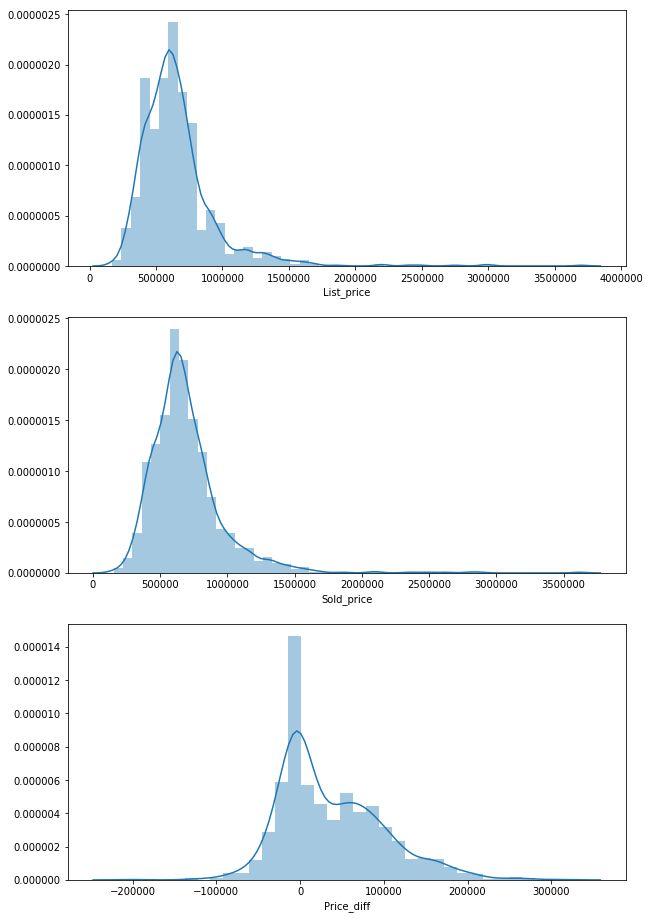

In [310]:
plt.figure(figsize = (10,16))
ax1 = plt.subplot(3,1,1)
sns.distplot(data['List_price'], ax = ax1)

ax2 = plt.subplot(3,1,2)
sns.distplot(data['Sold_price'], ax= ax2)

ax3 = plt.subplot(3,1,3)
sns.distplot(data['Price_diff'], ax = ax3)

### Sqft_min

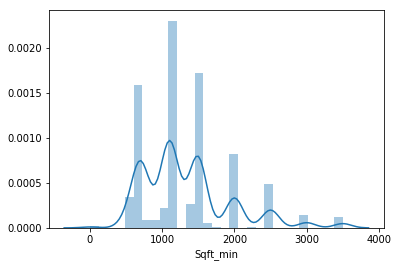

In [317]:
sns.distplot((data.loc[~data.Sqft_min.isnull(),'Sqft_min']).astype('float'))

In [318]:
data.Sqft_min.value_counts

<bound method IndexOpsMixin.value_counts of 0       2000.0
1       3000.0
2       2500.0
3       1100.0
4        600.0
         ...  
1195     700.0
1196    3000.0
1197    2000.0
1198     700.0
1199    1100.0
Name: Sqft_min, Length: 1200, dtype: float64>

In [323]:
data.columns

Index(['Page_no', 'Link_no', 'Address', 'Sold_price', 'List_price', 'Style',
       'Bedrooms', 'Bathrooms', 'Sqft_min', 'Sqft_max', 'Latitude',
       'Longitude', 'Postal_code', 'Added_at', 'Sold_at', 'Last_status',
       'Link_path', 'Address_path', 'Link_num', 'Title', 'Type', 'Exterior',
       'Basement', 'Parking', 'Kitchens', 'Lot_frontage', 'Lot_depth',
       'Parking_included', 'Parking_spaces', 'Approx_age', 'Extras',
       'Is_rental', 'Description', 'MLS', 'Neighbourhood', 'Link', 'Garage',
       'Heat', 'Heating_fuel', 'AC', 'Price_diff', 'Price%'],
      dtype='object')

In [13]:
data_GB = pd.DataFrame(columns=['Page_no','Link_no','Address','Sold_price','List_price','Style',
                                'Bedrooms','Bathrooms','Sqft_min','Sqft_max','Latitude',
                                'Longitude','Postal_code','Added_at','Sold_at','Last_status',
                                'Link_path','Address_path'])


total_pages = 3
i = 0
skipped = []

for num in range(1, total_pages+1):
    try:
        url = 'https://www.zoocasa.com/services/api/v3/listings?filter%5Badditional%5D%5Bcondo-or-townhouse%5D%5Blocker%5D=any&filter%5Badditional%5D%5Bcondo-or-townhouse%5D%5Bmaintenance-fee%5D=&filter%5Badditional%5D%5Bhouse%5D%5Bbasement-apartment%5D=false&filter%5Badditional%5D%5Bhouse%5D%5Bduplex%5D=false&filter%5Badditional%5D%5Bhouse%5D%5Bfourplex%2B%5D=false&filter%5Badditional%5D%5Bhouse%5D%5Bsingle-family%5D=false&filter%5Badditional%5D%5Bhouse%5D%5Btriplex%5D=false&filter%5Barea-name%5D=&filter%5Bbathrooms%5D=1%2B&filter%5Bbedrooms%5D=0%2B&filter%5Bfireplace%5D=false&filter%5Bgarage%5D=false&filter%5Bhome-type%5D%5Bcondo%5D=true&filter%5Bhome-type%5D%5Bhouse-attached%5D=true&filter%5Bhome-type%5D%5Bhouse-detached%5D=true&filter%5Bhome-type%5D%5Bhouse-semidetached%5D=true&filter%5Bhome-type%5D%5Btownhouse%5D=true&filter%5Blatitude%5D=43.653226&filter%5Blisted-since%5D=&filter%5Blongitude%5D=-79.3831843&filter%5Bopen-house%5D=false&filter%5Bparking-spaces%5D=0%2B&filter%5Bpool%5D=false&filter%5Bprice-max%5D=&filter%5Bprice-min%5D=&filter%5Brental%5D=false&filter%5Bslug%5D=grimsby-on&filter%5Bsqft-max%5D=&filter%5Bsqft-min%5D=&filter%5Bstatus%5D=not-available-sold&filter%5Bwaterfront%5D=false&filter%5Bzoom%5D=14&page%5Bnumber%5D='+str(num)+'&page%5Bsize%5D=25&sort=-date'
        raw = requests.get(url).json()
        
        for listing in raw['data']:
            
            try:
            
                data_GB.loc[i,'Page_no'] = num
                data_GB.loc[i,'Link_no'] = i+1
                att = listing['attributes']
                data_GB.loc[i,'Address'] = att['street-number']+" "+att['street-name']
                data_GB.loc[i,'Sold_price'] = att['sold-price']
                data_GB.loc[i,'List_price'] = att['price']
                data_GB.loc[i,'Style'] = att['style-name']
                data_GB.loc[i,'Bedrooms'] = att['bedrooms']
                data_GB.loc[i,'Bathrooms'] = att['bathrooms']
                #data_HT.loc[i,'Sqft_max'] = att['square-footage']['max']
                #data_HT.loc[i,'Sqft_min'] = att['square-footage']['min']
                if not att['position'] == None:
                    data_GB.loc[i,'Latitude'] = att['position']['coordinates'][0]
                    data_GB.loc[i,'Longitude'] = att['position']['coordinates'][1]
                else:
                    data_GB.loc[i,'Latitude'] = np.nan
                    data_GB.loc[i,'Longitude'] = np.nan
                data_GB.loc[i,'Postal_code'] = att['postal-code']
                data_GB.loc[i,'Added_at'] = att['added-at']
                data_GB.loc[i,'Sold_at'] = att['sold-at']
                data_GB.loc[i,'Last_status'] = att['last-status']
                data_GB.loc[i,'Link_path'] = att['path']
                data_GB.loc[i,'Address_path'] = att['address-path']
                data_GB.loc[i,'Sqft_max'] = att['square-footage']['max']
                data_H.loc[i,'Sqft_min'] = att['square-footage']['min']
                
            except:
                pass
                print('Problem with Page',num,'Address:', att['street-number']+" "+att['street-name'])
            
            i += 1
            
        time.sleep(1)
        
    except:
        print('Problem with page',num)
        skipped.append(i)
        continue

data_GB.to_excel('data_GB.xlsx')
data_GB.shape

Problem with Page 1 Address: 5 Niagara St
Problem with Page 1 Address: 37 Griffith Dr
Problem with Page 1 Address: 55 Princess Blvd
Problem with Page 1 Address: 12 Evergreens Dr
Problem with Page 1 Address: 8 Gage St
Problem with Page 1 Address: 195 Woolverton Rd
Problem with Page 1 Address: 10 Concord Pl
Problem with Page 1 Address: 51 Arrowhead Lane
Problem with Page 1 Address: 19 George St
Problem with Page 1 Address: 4 Tomahawk Dr
Problem with Page 1 Address: 125 Livingston Ave
Problem with Page 1 Address: 515 Winston Rd
Problem with Page 1 Address: 6 Chestnut Dr
Problem with Page 1 Address: 23 Golf Woods Dr
Problem with Page 1 Address: 185 Livingston Ave
Problem with Page 1 Address: 69 Stewart St
Problem with Page 1 Address: 11 Nassau Dr
Problem with Page 1 Address: 93 Udell Way
Problem with Page 1 Address: 130 Livingston Ave
Problem with Page 1 Address: 45 Emily St
Problem with Page 1 Address: 22 Conrad Pl
Problem with Page 1 Address: 122 Central Ave
Problem with Page 1 Address: 

(75, 18)

In [14]:
data_GB.head().T

,0,1,2,3,4
Page_no,1,1,1,1,1
Link_no,1,2,3,4,5
Address,5 Niagara St,37 Griffith Dr,55 Princess Blvd,12 Evergreens Dr,8 Gage St
Sold_price,455000.0,950000.0,905000.0,963000.0,790000.0
List_price,399777.0,899900.0,799900.0,849900.0,649900.0
Style,condo-highrise,house-detached,house-detached,house-detached,house-attached
Bedrooms,2,4,4,3,3
Bathrooms,1,4,4,4,3
Sqft_min,NaN,NaN,NaN,NaN,NaN
Sqft_max,999,2000,2500,2500,2000


In [15]:
data_BT = pd.DataFrame(columns=['Page_no','Link_no','Address','Sold_price','List_price','Style',
                                'Bedrooms','Bathrooms','Sqft_min','Sqft_max','Latitude',
                                'Longitude','Postal_code','Added_at','Sold_at','Last_status',
                                'Link_path','Address_path'])


total_pages = 52
i = 0
skipped = []

for num in range(1, total_pages+1):
    try:
        url = 'https://www.zoocasa.com/services/api/v3/listings?filter%5Badditional%5D%5Bcondo-or-townhouse%5D%5Blocker%5D=any&filter%5Badditional%5D%5Bcondo-or-townhouse%5D%5Bmaintenance-fee%5D=&filter%5Badditional%5D%5Bhouse%5D%5Bbasement-apartment%5D=false&filter%5Badditional%5D%5Bhouse%5D%5Bduplex%5D=false&filter%5Badditional%5D%5Bhouse%5D%5Bfourplex%2B%5D=false&filter%5Badditional%5D%5Bhouse%5D%5Bsingle-family%5D=false&filter%5Badditional%5D%5Bhouse%5D%5Btriplex%5D=false&filter%5Barea-name%5D=&filter%5Bbathrooms%5D=1%2B&filter%5Bbedrooms%5D=0%2B&filter%5Bfireplace%5D=false&filter%5Bgarage%5D=false&filter%5Bhome-type%5D%5Bcondo%5D=true&filter%5Bhome-type%5D%5Bhouse-attached%5D=true&filter%5Bhome-type%5D%5Bhouse-detached%5D=true&filter%5Bhome-type%5D%5Bhouse-semidetached%5D=true&filter%5Bhome-type%5D%5Btownhouse%5D=true&filter%5Blatitude%5D=43.653226&filter%5Blisted-since%5D=&filter%5Blongitude%5D=-79.3831843&filter%5Bopen-house%5D=false&filter%5Bparking-spaces%5D=0%2B&filter%5Bpool%5D=false&filter%5Bprice-max%5D=&filter%5Bprice-min%5D=&filter%5Brental%5D=false&filter%5Bslug%5D=burlington-on&filter%5Bsqft-max%5D=&filter%5Bsqft-min%5D=&filter%5Bstatus%5D=not-available-sold&filter%5Bwaterfront%5D=false&filter%5Bzoom%5D=14&page%5Bnumber%5D='+str(num)+'&page%5Bsize%5D=25&sort=-date'
        raw = requests.get(url).json()
        
        for listing in raw['data']:
            
            try:
            
                data_BT.loc[i,'Page_no'] = num
                data_BT.loc[i,'Link_no'] = i+1
                att = listing['attributes']
                data_BT.loc[i,'Address'] = att['street-number']+" "+att['street-name']
                data_BT.loc[i,'Sold_price'] = att['sold-price']
                data_BT.loc[i,'List_price'] = att['price']
                data_BT.loc[i,'Style'] = att['style-name']
                data_BT.loc[i,'Bedrooms'] = att['bedrooms']
                data_BT.loc[i,'Bathrooms'] = att['bathrooms']
                #data_HT.loc[i,'Sqft_max'] = att['square-footage']['max']
                #data_HT.loc[i,'Sqft_min'] = att['square-footage']['min']
                if not att['position'] == None:
                    data_BT.loc[i,'Latitude'] = att['position']['coordinates'][0]
                    data_BT.loc[i,'Longitude'] = att['position']['coordinates'][1]
                else:
                    data_BT.loc[i,'Latitude'] = np.nan
                    data_BT.loc[i,'Longitude'] = np.nan
                data_BT.loc[i,'Postal_code'] = att['postal-code']
                data_BT.loc[i,'Added_at'] = att['added-at']
                data_BT.loc[i,'Sold_at'] = att['sold-at']
                data_BT.loc[i,'Last_status'] = att['last-status']
                data_BT.loc[i,'Link_path'] = att['path']
                data_BT.loc[i,'Address_path'] = att['address-path']
                data_BT.loc[i,'Sqft_max'] = att['square-footage']['max']
                data_BT.loc[i,'Sqft_min'] = att['square-footage']['min']
                
            except:
                pass
                print('Problem with Page',num,'Address:', att['street-number']+" "+att['street-name'])
            
            i += 1
            
        time.sleep(1)
        
    except:
        print('Problem with page',num)
        skipped.append(i)
        continue

data_BT.to_excel('data_BT.xlsx')
data_BT.shape

Problem with Page 1 Address: 602 Jennifer Cres
Problem with Page 1 Address: 5399 Cornwall Cres
Problem with Page 1 Address: 4605 Keystone Cres
Problem with Page 3 Address: 1037 Fernridge Common
Problem with Page 3 Address: 3371 Cardiff Cres
Problem with Page 3 Address: 4330 Ingram Common
Problem with Page 4 Address: 2216 Bluegrass Lane
Problem with Page 4 Address: 5181 Fernbrook Crt
Problem with Page 4 Address: 2335 Vanessa Dr
Problem with Page 5 Address: 1441 Mountain Grove Ave
Problem with Page 5 Address: 4241 Sarazen Dr
Problem with Page 5 Address: 2147 Donald Rd
Problem with Page 5 Address: 540 Locust St N
Problem with Page 5 Address: 338 Johnston Dr
Problem with Page 6 Address: 5140 Cherryhill Cres
Problem with Page 6 Address: 1276 Dundas St
Problem with Page 6 Address: 2312 Middlesmoor Cres
Problem with Page 6 Address: 1269 Treeland St
Problem with Page 6 Address: 4450 Hawthorne Dr
Problem with Page 7 Address: 245 Hammersmith Crt
Problem with Page 7 Address: 3370 Mikalda Rd
Probl

(1300, 18)

In [ ]:
data_TR = pd.DataFrame(columns=['Page_no','Link_no','Address','Sold_price','List_price','Style',
                                'Bedrooms','Bathrooms','Sqft_min','Sqft_max','Latitude',
                                'Longitude','Postal_code','Added_at','Sold_at','Last_status',
                                'Link_path','Address_path'])


total_pages = 52
i = 0
skipped = []

for num in range(1, total_pages+1):
    try:
        url = 'https://www.zoocasa.com/services/api/v3/listings?filter%5Badditional%5D%5Bcondo-or-townhouse%5D%5Blocker%5D=any&filter%5Badditional%5D%5Bcondo-or-townhouse%5D%5Bmaintenance-fee%5D=&filter%5Badditional%5D%5Bhouse%5D%5Bbasement-apartment%5D=false&filter%5Badditional%5D%5Bhouse%5D%5Bduplex%5D=false&filter%5Badditional%5D%5Bhouse%5D%5Bfourplex%2B%5D=false&filter%5Badditional%5D%5Bhouse%5D%5Bsingle-family%5D=false&filter%5Badditional%5D%5Bhouse%5D%5Btriplex%5D=false&filter%5Barea-name%5D=&filter%5Bbathrooms%5D=1%2B&filter%5Bbedrooms%5D=0%2B&filter%5Bfireplace%5D=false&filter%5Bgarage%5D=false&filter%5Bhome-type%5D%5Bcondo%5D=true&filter%5Bhome-type%5D%5Bhouse-attached%5D=true&filter%5Bhome-type%5D%5Bhouse-detached%5D=true&filter%5Bhome-type%5D%5Bhouse-semidetached%5D=true&filter%5Bhome-type%5D%5Btownhouse%5D=true&filter%5Blatitude%5D=43.653226&filter%5Blisted-since%5D=&filter%5Blongitude%5D=-79.3831843&filter%5Bopen-house%5D=false&filter%5Bparking-spaces%5D=0%2B&filter%5Bpool%5D=false&filter%5Bprice-max%5D=&filter%5Bprice-min%5D=&filter%5Brental%5D=false&filter%5Bslug%5D=burlington-on&filter%5Bsqft-max%5D=&filter%5Bsqft-min%5D=&filter%5Bstatus%5D=not-available-sold&filter%5Bwaterfront%5D=false&filter%5Bzoom%5D=14&page%5Bnumber%5D='+str(num)+'&page%5Bsize%5D=25&sort=-date'
        raw = requests.get(url).json()
        
        for listing in raw['data']:
            
            try:
            
                data_BT.loc[i,'Page_no'] = num
                data_BT.loc[i,'Link_no'] = i+1
                att = listing['attributes']
                data_BT.loc[i,'Address'] = att['street-number']+" "+att['street-name']
                data_BT.loc[i,'Sold_price'] = att['sold-price']
                data_BT.loc[i,'List_price'] = att['price']
                data_BT.loc[i,'Style'] = att['style-name']
                data_BT.loc[i,'Bedrooms'] = att['bedrooms']
                data_BT.loc[i,'Bathrooms'] = att['bathrooms']
                #data_HT.loc[i,'Sqft_max'] = att['square-footage']['max']
                #data_HT.loc[i,'Sqft_min'] = att['square-footage']['min']
                if not att['position'] == None:
                    data_BT.loc[i,'Latitude'] = att['position']['coordinates'][0]
                    data_BT.loc[i,'Longitude'] = att['position']['coordinates'][1]
                else:
                    data_BT.loc[i,'Latitude'] = np.nan
                    data_BT.loc[i,'Longitude'] = np.nan
                data_BT.loc[i,'Postal_code'] = att['postal-code']
                data_BT.loc[i,'Added_at'] = att['added-at']
                data_BT.loc[i,'Sold_at'] = att['sold-at']
                data_BT.loc[i,'Last_status'] = att['last-status']
                data_BT.loc[i,'Link_path'] = att['path']
                data_BT.loc[i,'Address_path'] = att['address-path']
                data_BT.loc[i,'Sqft_max'] = att['square-footage']['max']
                data_BT.loc[i,'Sqft_min'] = att['square-footage']['min']
                
            except:
                pass
                print('Problem with Page',num,'Address:', att['street-number']+" "+att['street-name'])
            
            i += 1
            
        time.sleep(1)
        
    except:
        print('Problem with page',num)
        skipped.append(i)
        continue

data_BT.to_excel('data_BT.xlsx')
data_BT.shape

In [119]:
data_HT = pd.read_excel('/Users/roxanneli/Desktop/City of Hamilton/project/data_HT.xlsx', index_col=0)
data_BT = pd.read_excel('/Users/roxanneli/Desktop/City of Hamilton/project/data_BT.xlsx', index_col=0)
data_GB = pd.read_excel('/Users/roxanneli/Desktop/City of Hamilton/project/data_GB.xlsx', index_col=0)

In [3]:
len(data_BT.Address.unique())

1001

In [4]:
len(data_GB.Address.unique())

67

In [5]:
len(data_HT.Address.unique())

1119

In [6]:
com_bound = gpd.read_file('/Users/roxanneli/Desktop/City of Hamilton/project/Community_Boundaries/Community_Boundaries.shp')
com_bound['geometry'] = com_bound['geometry'].to_crs({'init':'EPSG:4269'})
com_bound

,OBJECTID,COMMUNITY_,geometry
0,1,Ancaster,"POLYGON ((-80.02699 43.24938, -80.02681 43.248..."
1,2,Dundas,"POLYGON ((-79.91171 43.30788, -79.91153 43.307..."
2,3,Flamborough,"POLYGON ((-79.88436 43.32917, -79.88442 43.329..."
3,4,Glanbrook,"POLYGON ((-79.92765 43.20982, -79.92761 43.209..."
4,5,Hamilton,"POLYGON ((-79.79851 43.29853, -79.79789 43.297..."
5,6,Stoney Creek,"POLYGON ((-79.67402 43.23066, -79.67393 43.230..."


In [7]:
subdivision = gpd.read_file('/Users/roxanneli/Desktop/City of Hamilton/project/CensusSubdivision2016/DMTI_2019_CMCS_CensusSubdivisionRegion2016.shp')
#subdivision['geometry'] = subdivision['geometry'].to_crs({'init':'EPSG:4269'})
#subdivision['geometry'] = gpd.GeoDataFrame(geometry=gpd.GeoSeries(subdivision['geometry']))
GB_geo = subdivision.loc[1033, 'geometry']
BT_geo = subdivision.loc[1050, 'geometry']

In [8]:
bound = com_bound.append({'OBJECTID': 7,'COMMUNITY_':'Grimsby','geometry':GB_geo},ignore_index=True)
bound = bound.append({'OBJECTID': 8,'COMMUNITY_':'Burlington','geometry':BT_geo}, ignore_index=True)
bound

,OBJECTID,COMMUNITY_,geometry
0,1,Ancaster,"POLYGON ((-80.02699 43.24938, -80.02681 43.248..."
1,2,Dundas,"POLYGON ((-79.91171 43.30788, -79.91153 43.307..."
2,3,Flamborough,"POLYGON ((-79.88436 43.32917, -79.88442 43.329..."
3,4,Glanbrook,"POLYGON ((-79.92765 43.20982, -79.92761 43.209..."
4,5,Hamilton,"POLYGON ((-79.79851 43.29853, -79.79789 43.297..."
5,6,Stoney Creek,"POLYGON ((-79.67402 43.23066, -79.67393 43.230..."
6,7,Grimsby,"POLYGON ((-79.59456 43.21918, -79.57933 43.210..."
7,8,Burlington,"POLYGON ((-79.86775 43.45768, -79.86735 43.457..."


In [9]:
import json
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar

bound_json = json.loads(bound.to_json())

json_data = json.dumps(bound_json)

geosource = GeoJSONDataSource(geojson = json_data)

p = figure(title = 'Hamilton Communities', plot_height = 600, plot_width = 950)
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None

p.patches('xs','ys', source = geosource, line_color='white',line_width=0.25,
          fill_alpha=1)

output_notebook()
show(p)

Loading BokehJS ...

In [10]:
all_community = data_HT.append(data_BT)
all_community = all_community.append(data_GB)
all_community.reset_index(drop=True, inplace=True)

In [11]:
for row, value in all_community[all_community['Latitude'].isnull()].iterrows():
    
    try:
        url = "https://api.mapbox.com/geocoding/v5/mapbox.places/"+str(all_community.loc[row, 'Address'])+".json?access_token=pk.eyJ1Ijoicm94YW5uZWxpIiwiYSI6ImNrbHYzZmJtdzB0cG4ycG1zb2thOTN6bHgifQ.97j0RoRwUFq51joGoqxzLw"
        resp = requests.get(url).json()
        for add in resp['features']:
            if (add['context'][1]['text'] in ['Hamilton','Burlington']) and (add['context'][3]['text'] == 'Canada'):
                all_community.loc[row, 'Latitude'] = add['geometry']['coordinates'][0]
                all_community.loc[row, 'Longitude'] = add['geometry']['coordinates'][1]
                break
                
    except:
        print(row)

In [12]:
all_community.loc[all_community.Latitude.isnull(), 'Latitude'] = -79.8265
all_community.loc[all_community.Longitude.isnull(), 'Longitude'] = 43.2488

In [14]:
all_community = all_community[~all_community.Sqft_min.isnull()]

In [15]:
all_community.isnull().sum()

Page_no         0
Link_no         0
Address         0
Sold_price      0
List_price      0
Style           0
Bedrooms        0
Bathrooms       0
Sqft_min        0
Sqft_max        0
Latitude        0
Longitude       0
Postal_code     1
Added_at        0
Sold_at         0
Last_status     0
Link_path       0
Address_path    0
dtype: int64

In [16]:
from shapely.geometry import Point, Polygon

def find_community(point, df):
    
    in_shape = []
    for sh in df.geometry:
        within = point.within(sh)
        in_shape.append(within)
    return df.loc[in_shape.index(True), 'COMMUNITY_']

all_community['Community'] = 0

not_assigned = []
for row, value in all_community.iterrows():
    try:
        result = find_community(Point(all_community.loc[row,'Latitude'], all_community.loc[row,'Longitude']), bound)
        all_community.loc[row,'Community'] = result
    except:
        not_assigned.append(row)
print(not_assigned)

[1943]


In [17]:
all_community.shape

(2141, 19)

In [19]:
all_community = all_community.loc[all_community.Community != 0]

In [20]:
all_community.shape

(2140, 19)

In [24]:
all_community['Sold_price'] = all_community['Sold_price'].astype('float')
all_community['Sqft_max'] = all_community['Sqft_max'].astype('float')
all_community['Sqft_min'] = all_community['Sqft_min'].astype('float')
all_community['Sold_psf'] = all_community['Sold_price'] / ((all_community['Sqft_max'] + all_community['Sqft_min'])/2)
com_med_price = all_community.groupby(['Community'])['Sold_psf'].mean().to_frame()
com_med_price

,Sold_psf
Community,
Ancaster,476.328744
Burlington,598.124083
Dundas,514.889540
Flamborough,504.736723
Glanbrook,460.237887
Grimsby,418.909091
Hamilton,477.828167
Stoney Creek,486.423356


In [25]:
bound

,OBJECTID,COMMUNITY_,geometry
0,1,Ancaster,"POLYGON ((-80.02699 43.24938, -80.02681 43.248..."
1,2,Dundas,"POLYGON ((-79.91171 43.30788, -79.91153 43.307..."
2,3,Flamborough,"POLYGON ((-79.88436 43.32917, -79.88442 43.329..."
3,4,Glanbrook,"POLYGON ((-79.92765 43.20982, -79.92761 43.209..."
4,5,Hamilton,"POLYGON ((-79.79851 43.29853, -79.79789 43.297..."
5,6,Stoney Creek,"POLYGON ((-79.67402 43.23066, -79.67393 43.230..."
6,7,Grimsby,"POLYGON ((-79.59456 43.21918, -79.57933 43.210..."
7,8,Burlington,"POLYGON ((-79.86775 43.45768, -79.86735 43.457..."


In [31]:
bound = bound.sort_values(by = 'COMMUNITY_')
bound['Sold_psf'] = com_med_price.Sold_psf.values
bound['Sold_psf'] = bound['Sold_psf'].astype(int)
bound

,OBJECTID,COMMUNITY_,geometry,Sold_psf
0,1,Ancaster,"POLYGON ((-80.02699 43.24938, -80.02681 43.248...",476
7,8,Burlington,"POLYGON ((-79.86775 43.45768, -79.86735 43.457...",598
1,2,Dundas,"POLYGON ((-79.91171 43.30788, -79.91153 43.307...",514
2,3,Flamborough,"POLYGON ((-79.88436 43.32917, -79.88442 43.329...",504
3,4,Glanbrook,"POLYGON ((-79.92765 43.20982, -79.92761 43.209...",460
6,7,Grimsby,"POLYGON ((-79.59456 43.21918, -79.57933 43.210...",418
4,5,Hamilton,"POLYGON ((-79.79851 43.29853, -79.79789 43.297...",477
5,6,Stoney Creek,"POLYGON ((-79.67402 43.23066, -79.67393 43.230...",486


In [89]:
bound['location'] = bound['geometry'].centroid
bound.location.crs = bound.crs
for i in range(bound.shape[0]):
    
    bound.loc[i, 'X'] = str(bound.loc[i,'location']).split(" ")[1][1:]
    bound.loc[i, 'Y'] = str(bound.loc[i,'location']).split(" ")[2][:-1]
    
bound['Label'] = bound['COMMUNITY_'] + ": " + "$" + bound['Sold_psf'].astype(str) + " /sf"
bound

,OBJECTID,COMMUNITY_,geometry,Sold_psf,location,X,Y,Label
0,1,Ancaster,"POLYGON ((-80.02699 43.24938, -80.02681 43.248...",476,POINT (-80.03410 43.20026),-80.03410498382374,43.20026289138157,Ancaster: $476 /sf
7,8,Burlington,"POLYGON ((-79.86775 43.45768, -79.86735 43.457...",598,POINT (-79.84394 43.38054),-79.8439369876594,43.38053555450897,Burlington: $598 /sf
1,2,Dundas,"POLYGON ((-79.91171 43.30788, -79.91153 43.307...",514,POINT (-79.94615 43.27208),-79.94614719480715,43.27207856000099,Dundas: $514 /sf
2,3,Flamborough,"POLYGON ((-79.88436 43.32917, -79.88442 43.329...",504,POINT (-80.06660 43.33489),-80.06659912056659,43.33488638294359,Flamborough: $504 /sf
3,4,Glanbrook,"POLYGON ((-79.92765 43.20982, -79.92761 43.209...",460,POINT (-79.83412 43.13302),-79.83411512726656,43.13302474290166,Glanbrook: $460 /sf
6,7,Grimsby,"POLYGON ((-79.59456 43.21918, -79.57933 43.210...",418,POINT (-79.57547 43.17943),-79.57546819789803,43.17942806769296,Grimsby: $418 /sf
4,5,Hamilton,"POLYGON ((-79.79851 43.29853, -79.79789 43.297...",477,POINT (-79.84311 43.24380),-79.84311397881552,43.24380371359175,Hamilton: $477 /sf
5,6,Stoney Creek,"POLYGON ((-79.67402 43.23066, -79.67393 43.230...",486,POINT (-79.71120 43.19518),-79.71119818614939,43.19517960926115,Stoney Creek: $486 /sf


In [92]:
all_community.Community.value_counts()

Burlington      1153
Hamilton         610
Stoney Creek     180
Flamborough       73
Ancaster          70
Dundas            33
Glanbrook         20
Grimsby            1
Name: Community, dtype: int64

In [110]:
from bokeh.palettes import brewer
from bokeh.models import Label, HoverTool, AjaxDataSource, LabelSet
from bokeh.models import LogColorMapper
from bokeh.palettes import YlGnBu9 as YlGnBu

#Read data to json.
t_geodata_json = json.loads(bound.drop(['location'],axis=1).to_json())

#Convert to String like object.
json_data = json.dumps(t_geodata_json)


#Input GeoJSON source that contains features for plotting.
geosource = GeoJSONDataSource(geojson = json_data)

p = figure( plot_height = 600 , plot_width = 950)
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None
p.xaxis.visible=False
p.yaxis.visible=False


# Add patch renderer to figure. 
palette = brewer['RdBu'][11] #[::-1]
color_mapper = LinearColorMapper(palette = palette,
                                 low = bound['Sold_psf'].min(),
                                 high = bound['Sold_psf'].max())

p1 = p.patches('xs','ys', source = geosource,
          line_color = 'white', line_width = 0.25, fill_alpha = 1,
         fill_color = {'field' :'Sold_psf', 'transform' : LogColorMapper(palette=YlGnBu[::-1])})

#p.add_tools(HoverTool(renderers=[p1],tooltips = [ ('Median Price','@Med_sold_price'),
                              # ('Community', '@COMMUNITY_')])
    

#tick_labels = {'650000':'650K','700000':'700K','750000':'750k','800000':'800k','850000':'850K'}

#color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8, width=500, height=15,
                     #border_line_color=None, location=(0,0),orientation='horizontal',major_label_overrides=tick_labels)


labels = LabelSet(x='X',y='Y',text='Label', level='glyph',
              x_offset=-50, y_offset=5, source=geosource)

p.add_layout(labels)





#palette1 = brewer['Spectral'][11]
#color_mapper1 = LinearColorMapper(palette=palette1, low=all_community['Sold_price'].min(),
  #                                                  high = all_community['Sold_price'].max())

#geosource1 = AjaxDataSource(all_community)
#p2 = p.circle('Latitude','Longitude', alpha=0.5, radius=0.0008, 
              #color={'field': 'Sold_price', 'transform':color_mapper1},
              #source=geosource1)

#p.add_tools(HoverTool(renderers=[p2],
                   #tooltips = [ ('Sold Price','@Sold_price'),
                    #           ('Address', '@Address')]))



#p.add_layout(color_bar, 'below')
p.border_fill_color = None
p.background_fill_color = None
p.outline_line_color = None
#Display figure in Jupyter Notebook.
output_notebook()
#Display figure.
show(p)

Loading BokehJS ...

In [97]:
! pip install selenium
from bokeh.io import export_png

from bokeh.io import export_svg

export_svg(plot, filename="plot.svg")

ImportError: cannot import name 'export_svg' from 'bokeh.io' (/Users/roxanneli/anaconda3/lib/python3.7/site-packages/bokeh/io/__init__.py)

In [82]:
all_community[all_community['Community']==0]

,Page_no,Link_no,Address,Sold_price,List_price,Style,Bedrooms,Bathrooms,Sqft_min,Sqft_max,Latitude,Longitude,Postal_code,Added_at,Sold_at,Last_status,Link_path,Address_path,Community
50,3,51,1491 Plains Rd W,830000.0,699900.0,townhouse,3,4,1600.0,1799.0,-79.895225,43.298193,L7T4H1,2021-02-13T18:51:19.875Z,2021-02-17T04:00:00.000Z,Sld,/burlington-on-real-estate/10514966-14-1491-pl...,/burlington-on-real-estate/14-1491-plains-rd-w,0
459,20,460,43 Lampman Dr,1152000.0,995000.0,house-detached,4,4,2500.0,3000.0,-79.629082,43.208967,L3M0E5,2021-01-11T20:47:09.708Z,2021-01-19T04:00:00.000Z,Sld,/grimsby-on-real-estate/10438298-43-lampman-dr...,/grimsby-on-real-estate/43-lampman-dr,0
492,21,493,759 Spring Gardens Rd,699000.0,729900.0,house-detached,3,1,1100.0,1500.0,-79.877893,43.288125,L7T1J5,2020-12-09T15:36:47.088Z,2021-01-15T04:00:00.000Z,Sld,/burlington-on-real-estate/10377771-759-spring...,/burlington-on-real-estate/759-spring-gardens-rd,0
811,34,812,71 Buttercup Cres,770000.0,799900.0,house-detached,3,4,1100.0,1500.0,NaN,NaN,L8B0X9,2020-11-19T18:36:36.055Z,2020-12-09T04:00:00.000Z,Sld,/hamilton-on-real-estate/10226503-71-buttercup...,/hamilton-on-real-estate/71-buttercup-cres,0
857,36,858,33 Highland Ave,330000.0,249900.0,house-detached,2,2,700.0,1100.0,NaN,NaN,L8L1Y8,2020-12-02T15:36:40.568Z,2020-12-04T04:00:00.000Z,Sld,/hamilton-on-real-estate/10346187-33-highland-...,/hamilton-on-real-estate/33-highland-ave,0
881,37,882,319 Macintosh Dr,626000.0,599900.0,house-detached,3,3,1100.0,1500.0,NaN,NaN,L8E4E1,2020-11-28T12:35:11.624Z,2020-12-02T04:00:00.000Z,Sld,/hamilton-on-real-estate/10248627-319-macintos...,/hamilton-on-real-estate/319-macintosh-dr,0


In [62]:
all_price = pd.pivot_table(all_community.loc[all_community.Community!=0], index=['Community'], columns=['Style'],values=['Sold_price'],
                          aggfunc = np.median)
all_price

Sold_price                                           \
Style        condo-highrise condo-lowrise condo-other house-attached   
Community                                                              
Ancaster           412450.0           NaN         NaN       652200.0   
Burlington         477800.0      672500.0    440000.0       797500.0   
Dundas                  NaN      606050.0         NaN            NaN   
Flamborough             NaN      715000.0         NaN       823000.0   
Glanbrook               NaN      680000.0         NaN       715000.0   
Grimsby            446000.0           NaN         NaN       700000.0   
Hamilton           370000.0      477500.0         NaN       590000.0   
Stoney Creek       423750.0      531500.0         NaN       679000.0   

                                                          
Style        house-detached house-semidetached townhouse  
Community                                                 
Ancaster          1125750.0           810000.0  679000.0  
Burlington        1153000.0           812500.0  647000.0  
Dundas             925900.0                NaN  500000.0  
Flamborough        997000.0           750000.0  664000.0  
Glanbrook         1005000.0           951000.0  610000.0  
Grimsby            904250.0           601750.0  501500.0  
Hamilton           631092.0           516000.0  505000.0  
Stoney Creek       889000.0           677550.0  575000.0

In [69]:
all_sf = pd.pivot_table(all_community.loc[(~all_community.Sqft_min.isnull())&(all_community.Community != 0)], index=['Community'],
                        values=['Sqft_min','Sqft_max'], aggfunc=np.median)
all_sf

,Sqft_max,Sqft_min
Community,,
Ancaster,2000.0,1500.0
Burlington,1500.0,1200.0
Dundas,1599.0,1400.0
Flamborough,2000.0,1500.0
Glanbrook,2000.0,1500.0
Hamilton,1500.0,1100.0
Stoney Creek,1999.0,1500.0


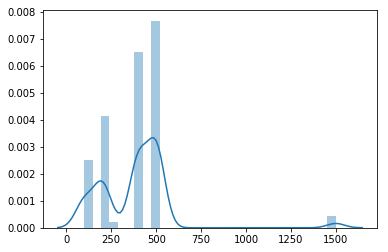

In [73]:
sqft = all_community[(~all_community.Sqft_min.isnull())&(all_community.Community != 0)]
sqft['Sqft_max'] = sqft['Sqft_max'].astype('float')
sqft['Sqft_min'] = sqft['Sqft_min'].astype('float')
sns.distplot(sqft['Sqft_max']-sqft['Sqft_min'])

In [77]:
sqft['Sqft_mean'] = (sqft['Sqft_min'] + sqft['Sqft_max'])/2
sqft['Price_per_sf'] = sqft['Sold_price']/sqft['Sqft_mean']
sqft.groupby(['Community'])['Price_per_sf'].median().to_frame().sort_values(by=['Price_per_sf'], ascending=False)

,Price_per_sf
Community,
Burlington,564.048658
Flamborough,487.873016
Dundas,471.111111
Hamilton,460.000000
Ancaster,452.857143
Stoney Creek,445.143429
Glanbrook,427.933333


In [80]:
sqft.Community.value_counts()

Burlington      1152
Hamilton         609
Stoney Creek     179
Flamborough       72
Ancaster          70
Dundas            33
Glanbrook         20
Name: Community, dtype: int64

In [114]:
data_GB.isnull().sum()

Page_no          0
Link_no          0
Address          0
Sold_price       0
List_price       0
Style            0
Bedrooms         0
Bathrooms        0
Sqft_min        75
Sqft_max        10
Latitude         0
Longitude        0
Postal_code      0
Added_at         0
Sold_at          0
Last_status      0
Link_path        0
Address_path     0
dtype: int64

In [120]:
data_GB.Sold_price = data_GB.Sold_price.astype(float)
data_GB = data_GB[~data_GB.Sqft_max.isnull()]
data_GB.Sqft_max = data_GB.Sqft_max.astype(float)
#data_GB.Sqft_min = data_GB.Sqft_min.astype(float)
data_GB['Sold_psf'] = data_GB['Sold_price']/data_GB['Sqft_max']

In [121]:
data_GB['Sold_psf'].mean()

475.5134862646379

,Page_no,Link_no,Address,Sold_price,List_price,Style,Bedrooms,Bathrooms,Sqft_min,Sqft_max,Latitude,Longitude,Postal_code,Added_at,Sold_at,Last_status,Link_path,Address_path
0,1,1,23 West Park Ave,1150000.0,999900.0,house-detached,4,4,2500.0,3000.0,-79.932103,43.258757,L8S3M4,2021-02-19T15:50:03.556Z,2021-02-22T04:00:00.000Z,Sld,/hamilton-on-real-estate/10528264-23-west-park...,/hamilton-on-real-estate/23-w-park-ave
1,1,2,156 Cumberland Ave,1240000.0,1125000.0,house-detached,5,3,2500.0,3000.0,-79.845189,43.244288,L8M1Z4,2021-02-17T18:38:09.287Z,2021-02-22T04:00:00.000Z,Sld,/hamilton-on-real-estate/10521579-156-cumberla...,/hamilton-on-real-estate/156-cumberland-ave
2,1,3,67 Caroline St S,560000.0,519900.0,condo-highrise,2,2,1400.0,1599.0,-79.876190,43.256313,L8P3K6,2021-02-10T12:38:31.320Z,2021-02-22T04:00:00.000Z,Sld,/hamilton-on-real-estate/10504088-605-67-carol...,/hamilton-on-real-estate/605-67-caroline-st-s
3,1,4,49 Dunkirk Dr,647500.0,498999.0,house-detached,4,3,NaN,NaN,-79.811048,43.229369,L8K4W9,2021-02-20T15:36:41.558Z,2021-02-21T04:00:00.000Z,Sld,/hamilton-on-real-estate/10531180-49-dunkirk-d...,/hamilton-on-real-estate/49-dunkirk-dr
4,1,5,37 Drakes Dr,852000.0,699900.0,house-detached,3,2,1100.0,1500.0,-79.733831,43.244303,L8E4G4,2021-02-18T20:52:03.775Z,2021-02-21T04:00:00.000Z,Sld,/hamilton-on-real-estate/10525754-37-drakes-dr...,/hamilton-on-real-estate/37-drakes-dr


In [126]:
Houses = pd.read_csv('/Users/roxanneli/Desktop/City of Hamilton/project/Hamilton Sold Listing Data.csv')
Houses.head().T

,0,1,2,3,4
Page_no,1,1,1,1,1
Link_no,1,2,3,4,5
Address,314 Darlington Crt,69 Richmond Cres,120 Cole St,11 Reynold St,832 Concession St
Sold_price,905000,1.456e+06,980000,1.05e+06,406000
List_price,699000,1.2999e+06,889900,849999,329900
Style,house-detached,house-detached,house-attached,house-detached,condo-highrise
Bedrooms,3,4,4,3,1
Bathrooms,2,4,4,2,1
Sqft_min,2000,3000,2500,1100,600
Sqft_max,2500,3500,3000,1500,699


In [127]:
Houses.Style.value_counts()

house-detached        813
house-attached        138
condo-highrise         87
townhouse              81
house-semidetached     62
condo-lowrise          19
Name: Style, dtype: int64

In [128]:
Houses.Type.value_counts()

Detached              788
Att/Row/Twnhouse      132
Condo Apt              92
Condo Townhouse        81
Semi-Detached          62
Duplex                 18
Triplex                 6
Link                    6
Comm Element Condo      4
Co-Op Apt               4
Det Condo               3
Semi-Det Condo          2
Cottage                 1
Store W/Apt/Offc        1
Name: Type, dtype: int64

In [129]:
Houses.Neighbourhood.value_counts()

Leckie Park          60
Community Beach      46
Landsdale            34
Ainslie Wood East    30
Stipley              30
                     ..
Maywood               1
Hamilton Beach A      1
Aldershot Central     1
Hamilton Beach C      1
Parkview East         1
Name: Neighbourhood, Length: 150, dtype: int64

In [131]:
zone = gpd.read_file('/Users/roxanneli/Desktop/City of Hamilton/Analysis/HAM zones/Conviniences.shp')
#subdivision['geometry'] = subdivision['geometry'].to_crs({'init':'EPSG:4269'})
#subdivision['geometry'] = gpd.GeoDataFrame(geometry=gpd.GeoSeries(subdivision['geometry']))
zone

,OBJECTID,WARD,Shape_Leng,Shape_Area,geometry
0,1,1,27766.730530,1.532535e+07,"POLYGON ((590254.492 4793555.528, 590252.942 4..."
1,2,2,15531.339603,5.920186e+06,"POLYGON ((592932.790 4790758.380, 592924.330 4..."
2,3,3,22796.903585,1.515768e+07,"POLYGON ((596762.649 4791781.958, 596747.957 4..."
3,4,4,30523.091939,2.041125e+07,"POLYGON ((597852.363 4792028.904, 597852.901 4..."
4,5,5,35522.417760,1.968943e+07,"POLYGON ((602608.532 4788723.851, 602629.676 4..."
5,6,6,21230.932750,1.609056e+07,"POLYGON ((596135.420 4783816.001, 596140.420 4..."
6,7,7,18061.031567,1.297913e+07,"POLYGON ((593655.564 4784676.950, 593655.432 4..."
7,8,8,16467.214891,1.353764e+07,"POLYGON ((590531.779 4783013.876, 590342.084 4..."
8,9,9,42091.349711,7.346908e+07,"POLYGON ((610255.110 4783365.001, 610264.560 4..."
9,10,10,31057.200763,3.139529e+07,"POLYGON ((603393.002 4788694.557, 603393.105 4..."


In [132]:
Neigh = gpd.read_file('/Users/roxanneli/Desktop/City of Hamilton/Analysis/Neighbourhood_Boundaries/Neighbourhood_Boundaries.shp')
Neigh

,OBJECTID,NH_NAME,NH_NUMBER,geometry
0,1,Industrial Sector D,072,"POLYGON ((595793.920 4791354.931, 596579.109 4..."
1,2,Industrial Sector C,071,"POLYGON ((594952.347 4791594.310, 595793.920 4..."
2,3,Industrial Sector K,078,"POLYGON ((597794.005 4792186.594, 597813.153 4..."
3,4,Confederation Park A,027,"POLYGON ((599840.850 4790918.930, 599841.300 4..."
4,5,Beasley,010,"POLYGON ((592130.366 4791034.697, 592147.598 4..."
...,...,...,...,...
132,133,Kernighan,086,"POLYGON ((590102.245 4785830.288, 590485.684 4..."
133,134,Falkirk East,044,"POLYGON ((587839.183 4785642.071, 587842.588 4..."
134,135,Broughton East,014,"POLYGON ((593118.598 4782861.602, 593134.362 4..."
135,136,Hannon West,064,"POLYGON ((593733.041 4782664.906, 593797.914 4..."


In [133]:
import json
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar

bound_json = json.loads(Neigh.to_json())

json_data = json.dumps(bound_json)

geosource = GeoJSONDataSource(geojson = json_data)

p = figure(title = 'Hamilton Communities', plot_height = 600, plot_width = 950)
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None

p.patches('xs','ys', source = geosource, line_color='white',line_width=0.25,
          fill_alpha=1)

output_notebook()
show(p)

Loading BokehJS ...